Team 3: Michael Foley, Karen Garcia, Jason Raeppold

In [239]:
#Project 1 - Portfolio Investment Advisor - Alcohol vs Marijuana

#Determine the following:
#-Historical industry performance
#-Industry performance comparison
#-Industry risk analysis
#-Portfolio recommendation

In [240]:
##Begin Pseudocode Here
#1-2

In [241]:
#Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
from MCForecastTools import MCSimulation
import numpy as np
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [242]:
def get_api_dataframe():
    # Set Alpaca API key and secret

    load_dotenv()
    api_key= os.getenv("ALPACA_API_KEY")
    sec_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

    alpaca = tradeapi.REST(
        api_key,
        sec_key,
        api_version="v2"
    )
# Get 3 years worth of historical data for Alcohol stocks

    start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
    end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

    tickers = ["BUD", "DEO", "SAM", "TAP", "STZ"]

# Set timeframe to "1Day" for Alpaca API
    timeframe = "1Day"

# Get current closing prices for Alcohol Stocks

    df_alc_data = alpaca.get_bars(
        tickers,
        timeframe,
        start = start_date,
        end = end_date
    ).df

#Set index to date and view dataframe
    df_alc_data.index = df_alc_data.index.date
    return df_alc_data

In [243]:
api_data_file = Path("api_data.pkl")
if api_data_file.is_file():
    print ("API data file exists")
    df_alc_data = pd.read_pickle(api_data_file)
else:
    print ("API file does not exist") 
    df_alc_data = get_api_dataframe()
    df_alc_data.to_pickle(api_data_file)
# Check if file exists
# If file does not exist then load api and save file
#else read data from pikl
df_alc_data.head()

API data file exists


,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,89.69,90.470,89.58,89.60,970834,9479,90.000447,BUD
2019-04-23,88.56,89.790,88.50,89.25,755451,7907,89.242818,BUD
2019-04-24,89.02,89.130,87.82,88.21,1038366,11509,88.324096,BUD
2019-04-25,86.89,87.020,86.00,86.64,1341678,13124,86.467163,BUD
2019-04-26,87.38,87.625,86.83,87.58,920430,9005,87.292918,BUD


In [244]:
# Set Alpaca API key and secret

load_dotenv()
api_key= os.getenv("ALPACA_API_KEY")
sec_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    api_key,
    sec_key,
    api_version="v2"
)

In [245]:
# Get 3 years worth of historical data for Alcohol stocks

start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

tickers = ["BUD", "DEO", "SAM", "TAP", "STZ"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for Alcohol Stocks

df_alc_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#Set index to date and view dataframe
df_alc_data.index = df_alc_data.index.date
df_alc_data.head(-5)


,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,89.69,90.4700,89.58,89.60,970834,9479,90.000447,BUD
2019-04-23,88.56,89.7900,88.50,89.25,755451,7907,89.242818,BUD
2019-04-24,89.02,89.1300,87.82,88.21,1038366,11509,88.324096,BUD
2019-04-25,86.89,87.0200,86.00,86.64,1341678,13124,86.467163,BUD
2019-04-26,87.38,87.6250,86.83,87.58,920430,9005,87.292918,BUD
...,...,...,...,...,...,...,...,...
2022-04-06,51.30,51.6600,50.52,50.76,1364998,19586,50.900272,TAP
2022-04-07,50.66,50.8750,49.77,50.49,1509046,19780,50.416991,TAP
2022-04-08,50.93,51.7389,50.59,51.56,1136563,15412,51.429797,TAP
2022-04-11,51.81,53.6400,51.80,52.84,1216072,19571,52.899706,TAP


In [246]:
#Verify equal amount of data.
df_alc_data["symbol"].value_counts()

BUD    757
DEO    757
SAM    757
STZ    757
TAP    757
Name: symbol, dtype: int64

In [247]:
#Drop null values
df_alc_data.dropna()

,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,89.69,90.470,89.5800,89.60,970834,9479,90.000447,BUD
2019-04-23,88.56,89.790,88.5000,89.25,755451,7907,89.242818,BUD
2019-04-24,89.02,89.130,87.8200,88.21,1038366,11509,88.324096,BUD
2019-04-25,86.89,87.020,86.0000,86.64,1341678,13124,86.467163,BUD
2019-04-26,87.38,87.625,86.8300,87.58,920430,9005,87.292918,BUD
...,...,...,...,...,...,...,...,...
2022-04-13,53.64,54.560,53.6400,54.29,1255859,19120,54.220964,TAP
2022-04-14,54.50,55.810,54.5000,55.61,2332000,21843,55.493185,TAP
2022-04-18,55.71,56.400,55.3400,55.63,1496739,20514,55.779267,TAP
2022-04-19,55.81,56.300,55.7075,55.87,992247,16712,55.912625,TAP


In [280]:
booze_fd = df_alc_data [["open", "high"]].copy()
booze_fd

In [248]:
# Pivot symbol and close price columns
alc_close_prices = df_alc_data.pivot(values=["close"], columns= "symbol")
alc_close_prices

close                               
symbol        BUD     DEO     SAM     STZ    TAP
2019-04-22  89.60  162.58  271.34  205.46  61.16
2019-04-23  89.25  163.80  277.73  207.48  61.28
2019-04-24  88.21  164.13  276.43  210.14  62.51
2019-04-25  86.64  164.17  300.00  212.16  62.80
2019-04-26  87.58  166.48  304.56  212.16  63.83
...           ...     ...     ...     ...    ...
2022-04-13  58.58  207.18  375.13  248.63  54.29
2022-04-14  58.78  209.22  365.76  251.42  55.61
2022-04-18  58.72  207.20  357.68  252.82  55.63
2022-04-19  59.19  203.66  364.87  253.87  55.87
2022-04-20  61.49  205.20  361.22  258.78  56.78

[757 rows x 5 columns]

<AxesSubplot:>

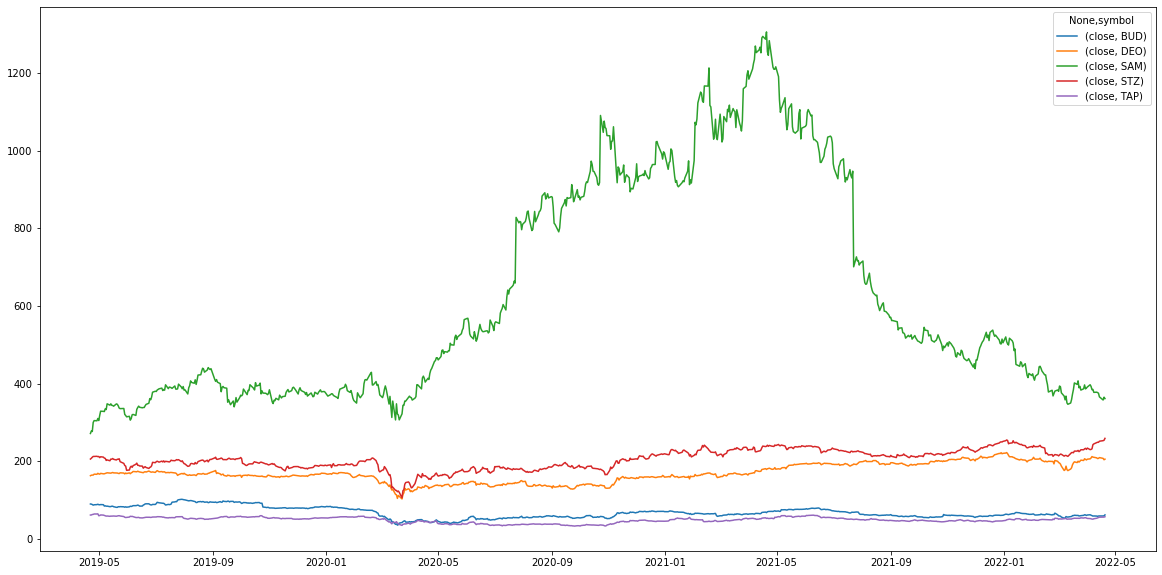

In [249]:
#Plot the close prices for the Alcohol Stocks
alc_close_prices.plot(figsize=(20,10))

In [250]:
alc_returns = alc_close_prices.pct_change().dropna()
alc_returns

close                                        
symbol           BUD       DEO       SAM       STZ       TAP
2019-04-23 -0.003906  0.007504  0.023550  0.009832  0.001962
2019-04-24 -0.011653  0.002015 -0.004681  0.012821  0.020072
2019-04-25 -0.017798  0.000244  0.085266  0.009613  0.004639
2019-04-26  0.010849  0.014071  0.015200  0.000000  0.016401
2019-04-29  0.004910 -0.002042 -0.001543  0.001791  0.000783
...              ...       ...       ...       ...       ...
2022-04-13  0.010871  0.002225 -0.004511 -0.000804  0.011552
2022-04-14  0.003414  0.009847 -0.024978  0.011221  0.024314
2022-04-18 -0.001021 -0.009655 -0.022091  0.005568  0.000360
2022-04-19  0.008004 -0.017085  0.020102  0.004153  0.004314
2022-04-20  0.038858  0.007562 -0.010004  0.019341  0.016288

[756 rows x 5 columns]

<AxesSubplot:>

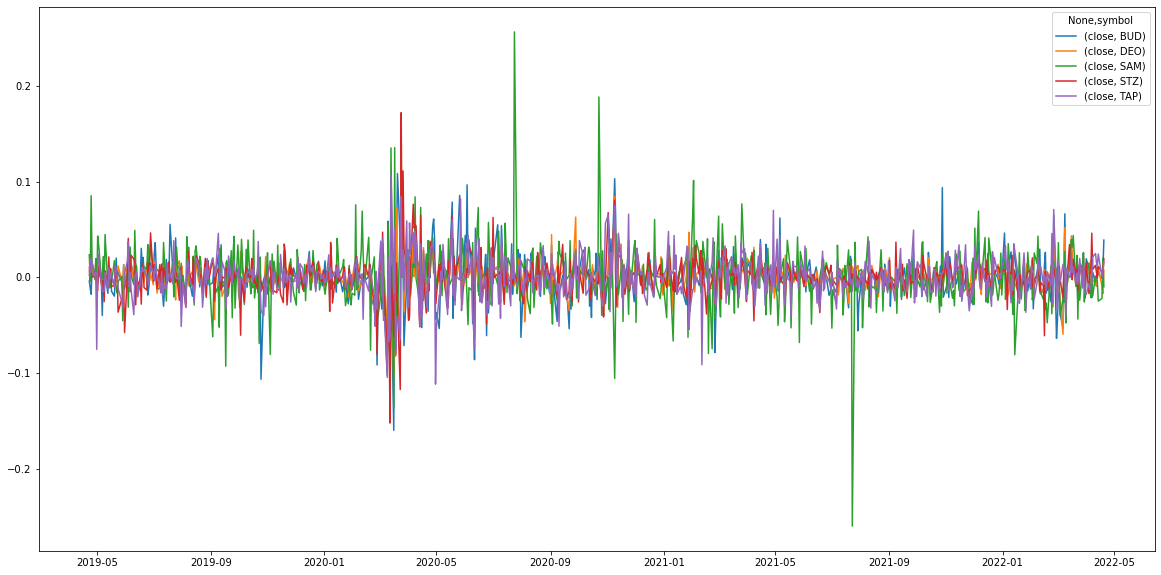

In [251]:
#Plot the returns for Alcohol Stocks
alc_returns.plot(figsize=(20,10))

In [252]:
# Get 3 years worth of historical data for Cannabis stocks

start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

tickers = ["VFF","JAZZ","CRON", "TLRY","CGC"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for Cannabis Stocks

df_cann_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#Set index to date and view dataframe
df_cann_data.index = df_cann_data.index.date
df_cann_data.head(-5)

,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,45.70,48.7000,45.0700,48.25,11914208,69791,47.142779,CGC
2019-04-23,48.20,48.6300,46.8600,47.41,8244109,44524,47.814767,CGC
2019-04-24,47.22,48.6600,46.6400,48.37,6386176,35773,48.075259,CGC
2019-04-25,48.16,48.5241,47.5000,48.20,4185409,22689,48.092160,CGC
2019-04-26,48.19,50.4300,48.1200,49.91,12612629,60890,49.787743,CGC
...,...,...,...,...,...,...,...,...
2022-04-06,5.16,5.2350,5.0301,5.14,480630,4559,5.137048,VFF
2022-04-07,5.13,5.1711,4.9600,5.04,356830,3783,5.061856,VFF
2022-04-08,5.01,5.0700,4.8200,4.83,1129375,6429,4.917287,VFF
2022-04-11,4.70,4.9200,4.6400,4.81,721407,5570,4.787688,VFF


In [253]:
#Verify equal amount of data
df_cann_data["symbol"].value_counts()

CGC     757
CRON    757
JAZZ    757
TLRY    757
VFF     757
Name: symbol, dtype: int64

In [254]:
# Pivot symbol and close price columns
cann_close_prices = df_cann_data.pivot(values=["close"], columns= "symbol")
cann_close_prices

close                             
symbol        CGC   CRON    JAZZ   TLRY    VFF
2019-04-22  48.25  16.86  125.97  51.82  11.56
2019-04-23  47.41  16.28  129.78  50.26  11.08
2019-04-24  48.37  16.59  129.42  51.30  12.29
2019-04-25  48.20  16.52  128.53  51.27  11.62
2019-04-26  49.91  17.16  130.99  53.15  11.57
...           ...    ...     ...    ...    ...
2022-04-13   7.11   3.49  162.30   6.42   4.88
2022-04-14   6.82   3.44  167.25   6.02   4.69
2022-04-18   5.99   3.26  164.07   5.74   4.47
2022-04-19   5.93   3.33  166.54   5.83   4.52
2022-04-20   5.73   3.21  168.00   5.41   4.45

[757 rows x 5 columns]

<AxesSubplot:>

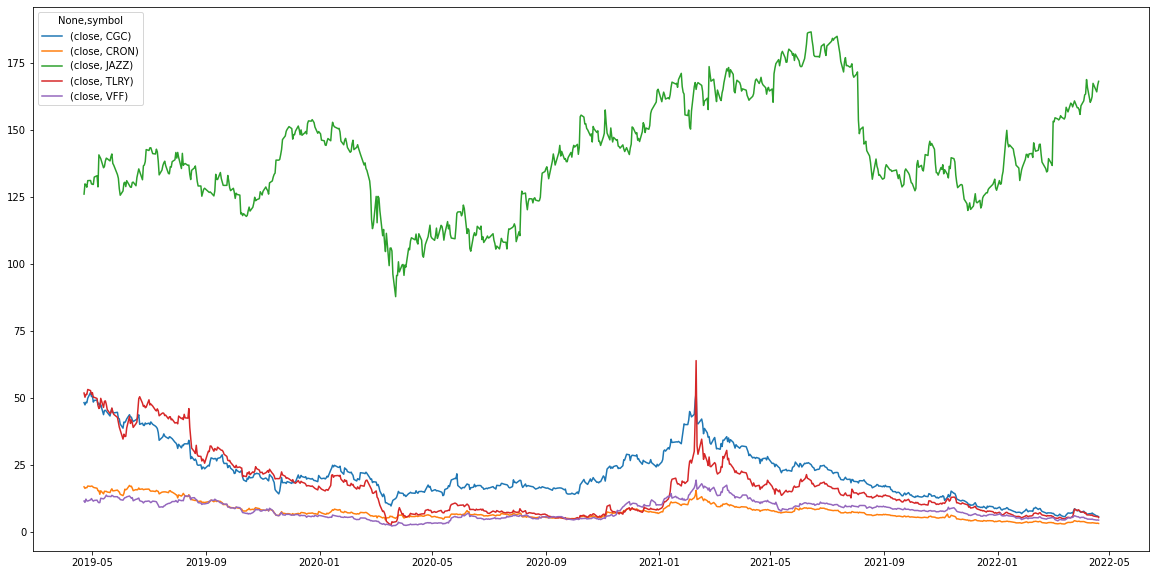

In [255]:
cann_close_prices.plot(figsize=(20,10))

In [256]:
cann_returns = cann_close_prices.pct_change().dropna()
cann_returns


close                                        
symbol           CGC      CRON      JAZZ      TLRY       VFF
2019-04-23 -0.017409 -0.034401  0.030245 -0.030104 -0.041522
2019-04-24  0.020249  0.019042 -0.002774  0.020692  0.109206
2019-04-25 -0.003515 -0.004219 -0.006877 -0.000585 -0.054516
2019-04-26  0.035477  0.038741  0.019140  0.036669 -0.004303
2019-04-29  0.042476 -0.008741  0.000458 -0.007902  0.038029
...              ...       ...       ...       ...       ...
2022-04-13  0.048673  0.029499  0.008450  0.030498  0.027368
2022-04-14 -0.040788 -0.014327  0.030499 -0.062305 -0.038934
2022-04-18 -0.121701 -0.052326 -0.019013 -0.046512 -0.046908
2022-04-19 -0.010017  0.021472  0.015055  0.015679  0.011186
2022-04-20 -0.033727 -0.036036  0.008767 -0.072041 -0.015487

[756 rows x 5 columns]

<AxesSubplot:>

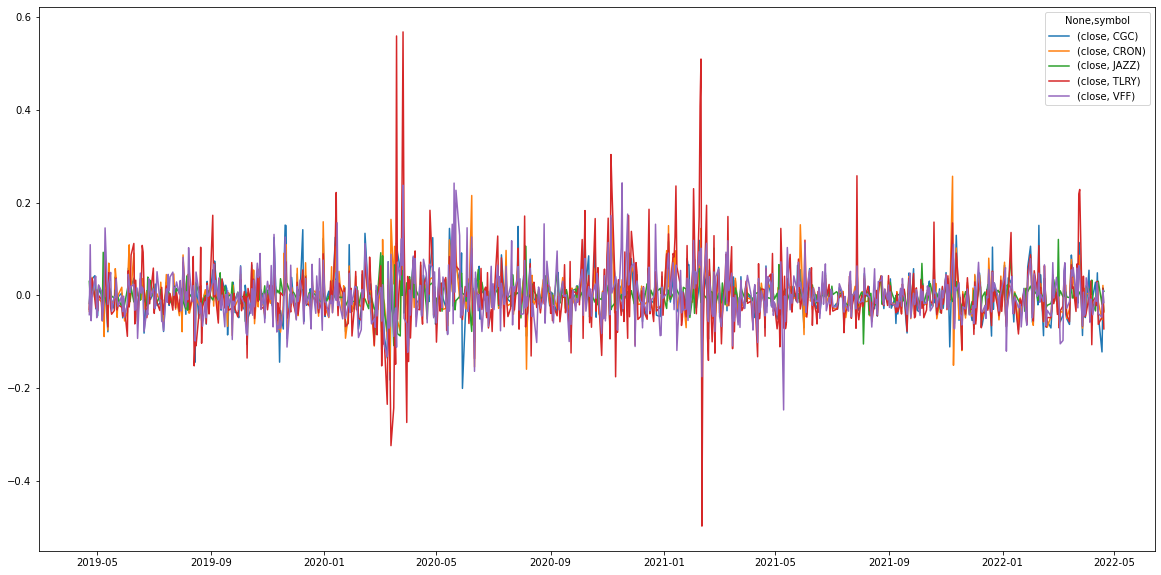

In [257]:
#Plot the Cannabis stocks returns
cann_returns.plot(figsize=(20,10))

In [258]:
combined_df = pd.concat([alc_close_prices, cann_close_prices],axis="columns", join= "inner")

#combined_df

In [259]:
#####close_price_df = combined_df["close"]

In [260]:
#####Plot data
#close_price_df.hvplot()

In [261]:
# Set weights for Alcohol Stocks
weights = [0.2, 0.2, 0.2, 0.2, 0.2] # equal weights for number of portfolios

# Calculate portfolio returns for Alcohol Portfolio
alc_portfolio_returns = alc_returns.dot(weights)
# Display sample data
alc_portfolio_returns

2019-04-23    0.007788
2019-04-24    0.003715
2019-04-25    0.016393
2019-04-26    0.011304
2019-04-29    0.000780
                ...   
2022-04-13    0.003867
2022-04-14    0.004764
2022-04-18   -0.005368
2022-04-19    0.003898
2022-04-20    0.014409
Length: 756, dtype: float64

In [262]:
# Set weights for Cannabis Stocks
weights = [0.2, 0.2, 0.2, 0.2, 0.2] # equal weights for number of portfolios

# Calculate portfolio returns for Alcohol Portfolio
cann_portfolio_returns = cann_returns.dot(weights)
# Display sample data
cann_portfolio_returns

2019-04-23   -0.018638
2019-04-24    0.033283
2019-04-25   -0.013942
2019-04-26    0.025145
2019-04-29    0.012864
                ...   
2022-04-13    0.028897
2022-04-14   -0.025171
2022-04-18   -0.057292
2022-04-19    0.010675
2022-04-20   -0.029705
Length: 756, dtype: float64

In [263]:
combined_returns = pd.concat([alc_portfolio_returns, cann_portfolio_returns],axis="columns", join= "inner")
combined_returns.columns= ["Alcohol Portfolio", "Cannabis Portfolio"]
combined_returns.dropna()

,Alcohol Portfolio,Cannabis Portfolio
2019-04-23,0.007788,-0.018638
2019-04-24,0.003715,0.033283
2019-04-25,0.016393,-0.013942
2019-04-26,0.011304,0.025145
2019-04-29,0.000780,0.012864
...,...,...
2022-04-13,0.003867,0.028897
2022-04-14,0.004764,-0.025171
2022-04-18,-0.005368,-0.057292
2022-04-19,0.003898,0.010675


In [264]:
combined_returns.hvplot()
#combined_returns.plot(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [265]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.hvplot()
#cumulative_returns.plot(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:xlabel='None-symbol', ylabel='None-symbol'>

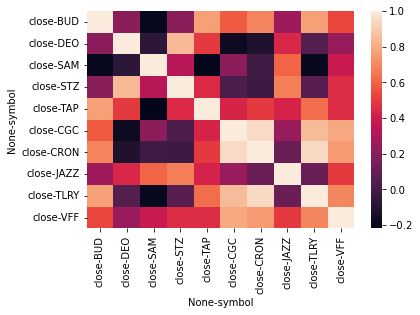

In [266]:
# Calculate and plot the correlation
correlation = combined_df.corr()
#correlation
sns.heatmap(correlation)

In [267]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()

Alcohol Portfolio     0.160845
Cannabis Portfolio    0.232457
dtype: float64

In [268]:
# Annualized Sharpe Ratios
sharpe_ratio = (cumulative_returns.mean() * 252) / (cumulative_returns.std() *np.sqrt(252))
sharpe_ratio

Alcohol Portfolio     11.161182
Cannabis Portfolio   -22.933665
dtype: float64

<AxesSubplot:>

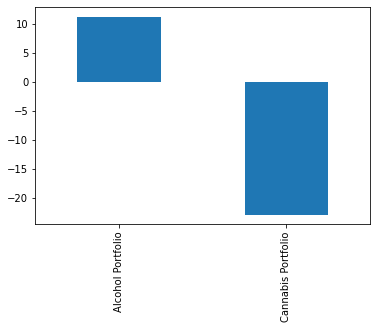

In [269]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

In [270]:
#Get 3 years worth of historical data for S&P500

start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

tickers = ["SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for Cannabis Stocks

df_sp500_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

#Set index to date and view dataframe
df_sp500_data.index = df_sp500_data.index.date
df_sp500_data.head(-5)

,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,289.17,290.435,289.0700,290.27,40520264,170767,290.002934,SPY
2019-04-23,290.68,293.140,290.4200,292.88,52411775,232023,292.102165,SPY
2019-04-24,292.76,293.160,292.0700,292.23,50469550,203858,292.580824,SPY
2019-04-25,292.12,292.780,290.7300,292.05,57875137,238260,292.051720,SPY
2019-04-26,292.12,293.490,291.2401,293.41,51449173,220594,292.642502,SPY
...,...,...,...,...,...,...,...,...
2022-04-06,446.87,448.930,443.4700,446.52,105592595,901634,446.345270,SPY
2022-04-07,445.67,450.690,443.5300,448.77,77538519,628673,447.098209,SPY
2022-04-08,448.04,450.630,445.9400,447.57,79148376,573491,448.250805,SPY
2022-04-11,444.11,445.000,439.3900,439.92,89825549,779421,442.206374,SPY


In [271]:
# Pivot symbol and close price columns
spy_close_prices = df_sp500_data.pivot(values=["close"], columns= "symbol")
spy_close_prices

,close
symbol,SPY
2019-04-22,290.27
2019-04-23,292.88
2019-04-24,292.23
2019-04-25,292.05
2019-04-26,293.41
...,...
2022-04-13,443.31
2022-04-14,437.79
2022-04-18,437.97


In [272]:
sp500_portfolio_returns = spy_close_prices.pct_change().dropna()
sp500_portfolio_returns

,close
symbol,SPY
2019-04-23,0.008992
2019-04-24,-0.002219
2019-04-25,-0.000616
2019-04-26,0.004657
2019-04-29,0.001568
...,...
2022-04-13,0.011454
2022-04-14,-0.012452
2022-04-18,0.000411


In [273]:
bench_cann_alc = pd.concat([alc_portfolio_returns, cann_portfolio_returns, sp500_portfolio_returns],axis="columns", join= "inner")
bench_cann_alc.columns= ["Alcohol Portfolio", "Cannabis Portfolio", "S&P 500 Portfolio"]
bench_cann_alc.dropna()

,Alcohol Portfolio,Cannabis Portfolio,S&P 500 Portfolio
2019-04-23,0.007788,-0.018638,0.008992
2019-04-24,0.003715,0.033283,-0.002219
2019-04-25,0.016393,-0.013942,-0.000616
2019-04-26,0.011304,0.025145,0.004657
2019-04-29,0.000780,0.012864,0.001568
...,...,...,...
2022-04-13,0.003867,0.028897,0.011454
2022-04-14,0.004764,-0.025171,-0.012452
2022-04-18,-0.005368,-0.057292,0.000411
2022-04-19,0.003898,0.010675,0.016143


In [274]:
#bench_can_alc.hvplot()

In [275]:
# Calculate cumulative returns of all portfolios
bench_cumulative_returns = (1 + bench_cann_alc).cumprod() - 1
# Plot cumulative returns
bench_cumulative_returns.hvplot()
#cumulative_returns.plot(figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [276]:
# Annualized Sharpe Ratios
bench_sharpe_ratio = (bench_cumulative_returns.mean() * 252) / (bench_cumulative_returns.std() *np.sqrt(252))
bench_sharpe_ratio

Alcohol Portfolio     11.161182
Cannabis Portfolio   -22.933665
S&P 500 Portfolio     17.756186
dtype: float64

<AxesSubplot:>

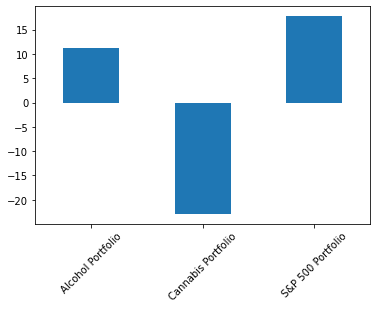

In [277]:
bench_sharpe_ratio.plot(kind="bar", rot=45)

Rolling 50-Day Beta for all portfolios

<AxesSubplot:title={'center':'Rolling 50-Day Beta'}>

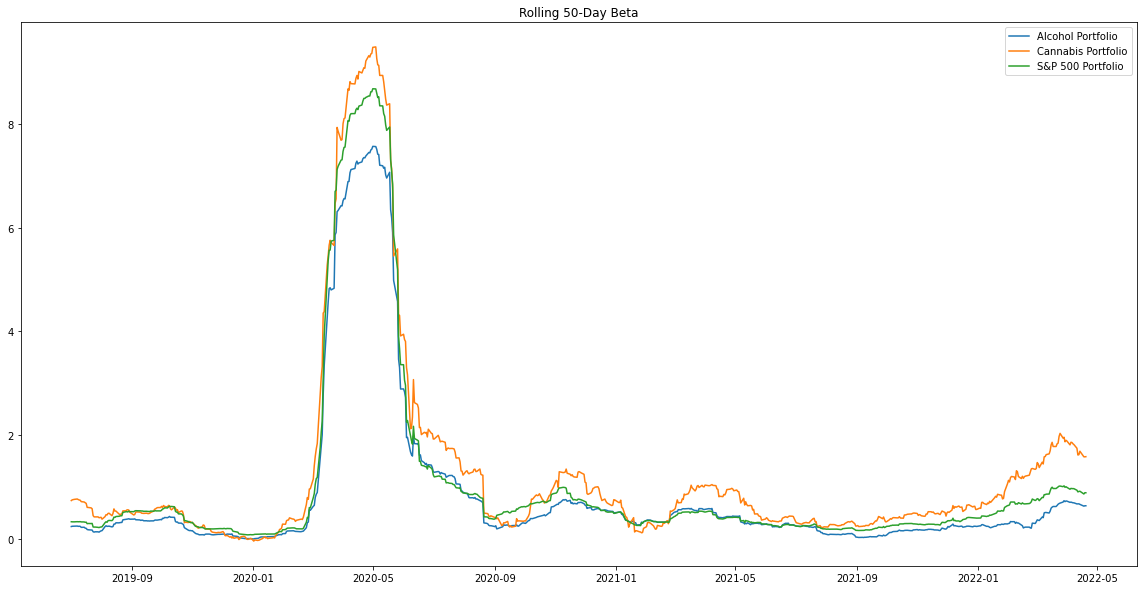

In [278]:
# Calculate and plot Beta
cov2 = bench_cann_alc.rolling(window=50).cov(bench_cann_alc["S&P 500 Portfolio"])
var2 = bench_cann_alc["S&P 500 Portfolio"].var()
beta2 = cov2 / var2
beta2.plot(figsize=(20,10), title= "Rolling 50-Day Beta")